In [22]:
import pandas as pd

df1= pd.read_csv('data/recommend_data.csv', encoding='utf-8')
df2= pd.read_csv('data/product_info.csv', encoding='utf-8')

In [21]:
joined_df = df1.merge(df2[['product_id', 'category1', 'category2']], on='product_id', how='inner')
joined_df = joined_df[['recom_id', 'product_id', 'category1', 'category2', 'gender', 'height', 'weight', 'keyword', 'size']]
joined_df

,recom_id,product_id,category1,category2,gender,height,weight,keyword,size
0,1,MMCCT701-BK,아우터,겨울 싱글 코트,남자,182,81,적당함,M
1,2,MMCCT701-BK,아우터,겨울 싱글 코트,남자,178,65,큼,XL
2,3,MMCCT701-BK,아우터,겨울 싱글 코트,남자,180,80,적당함,L
3,4,MMCCT701-BK,아우터,겨울 싱글 코트,남자,181,65,적당함,L
4,5,MMCCT701-BK,아우터,겨울 싱글 코트,여자,170,70,큼,L
...,...,...,...,...,...,...,...,...,...
3929,3938,MMCCT703-BK,아우터,겨울 기타 코트,남자,173,70,적당함,M
3930,3939,MMCCT703-BK,아우터,겨울 기타 코트,남자,178,60,적당함,L
3931,3940,MMCCT703-BK,아우터,겨울 기타 코트,남자,188,95,적당함,2XL
3932,3941,MMCCT703-BK,아우터,겨울 기타 코트,남자,183,105,적당함,2XL


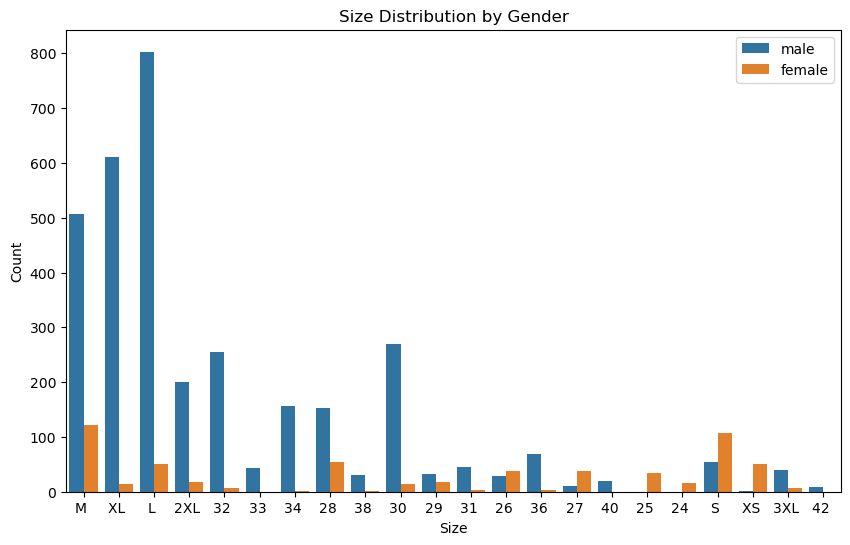

In [43]:
# 바 차트

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.countplot(data=joined_df, x='size', hue='gender')

plt.title('Size Distribution by Gender')
plt.xlabel('Size')
plt.ylabel('Count')
plt.legend(('male', 'female'))

plt.show()

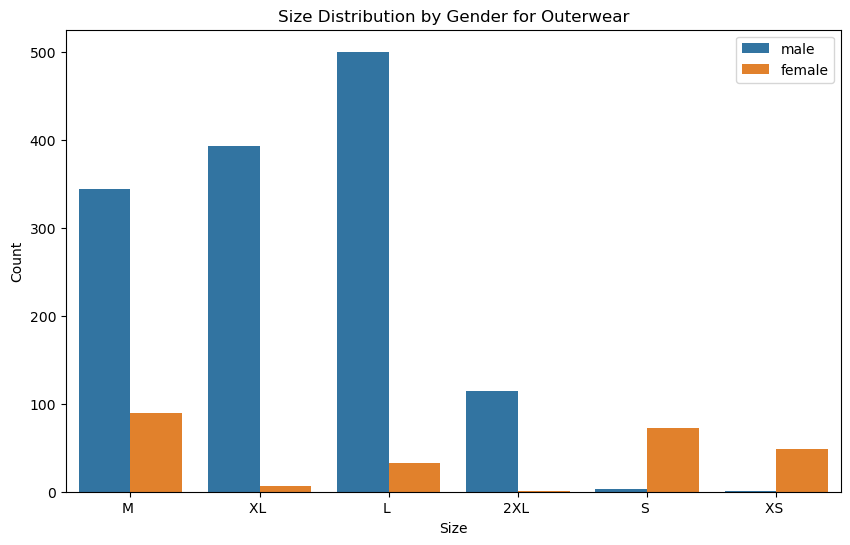

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'category1' 값이 '아우터'인 데이터만 선택
filtered_df = joined_df[joined_df['category1'] == '아우터']

plt.figure(figsize=(10, 6))

sns.countplot(data=filtered_df, x='size', hue='gender')

plt.title('Size Distribution by Gender for Outerwear')
plt.xlabel('Size')
plt.ylabel('Count')
plt.legend(('male', 'female'))

plt.show()


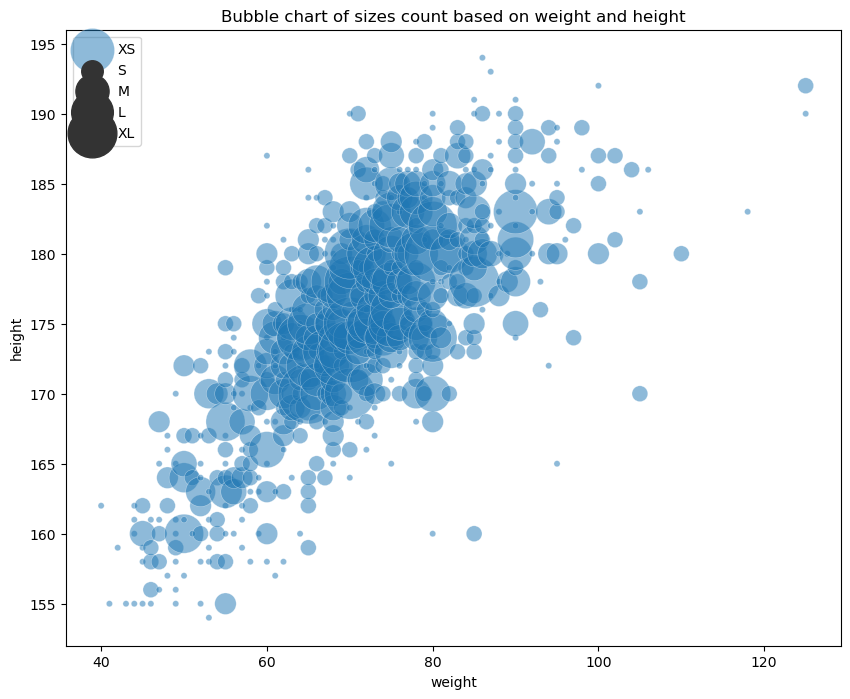

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 같은 'category1'을 가진 'product_id'를 가진 데이터만 추출
category1_df = joined_df[joined_df['category1'] == '아우터']

# 'weight', 'height' 별로 그룹화하여 'size'의 개수 계산
grouped_df = category1_df.groupby(['weight', 'height'])['size'].count().reset_index()

# 'size'의 개수를 'node'라는 새로운 열로 저장
grouped_df.rename(columns={'size': 'node'}, inplace=True)

# 버블 차트 생성
plt.figure(figsize=(10, 8))
sns.scatterplot(data=grouped_df, x='weight', y='height', size='node', alpha=0.5, sizes=(20, 2000))
plt.title('Bubble chart of sizes count based on weight and height')
plt.legend(('XS','S','M','L','XL'))

plt.show()
